In [1]:
cd '/content/drive/My Drive/machine_learning_cl/Mult_class_neural_networks'

/content/drive/My Drive/machine_learning_cl/Mult_class_neural_networks


#Input Data

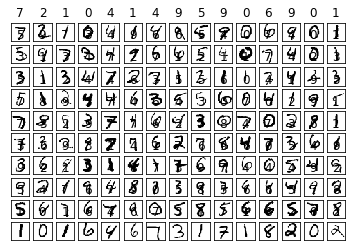

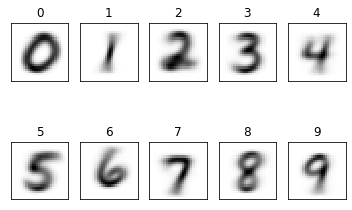

In [2]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


##Split data to (train images, train labels) and (test images, test labels)

In [0]:
numtrainimages = 6000
numtestimages = 4000
train_images  = np.empty((size_row * size_col, numtrainimages), dtype=float)
train_label  = np.empty(numtrainimages, dtype=int)
test_images  = np.empty((size_row * size_col, numtestimages), dtype=float)
test_label  = np.empty(numtestimages, dtype=int)

train_images = list_image[:, :numtrainimages]
train_label = list_label[:numtrainimages]
test_images = list_image[:, numtrainimages:]
test_label  = list_label[numtrainimages:]

# Neural Network Architecture

Object function \
$$
J(\theta)=\frac {1} {m} ​\sum_{i=1}^{m​}\sum_{k=0}^{k=9}​(−l_k^{(i)}​log(h_k^{(i)}​)−(1−l_k^{(i)}​)log(1−h_k{(i)}​))
$$

Gradient Descent
$$
\theta_k^{t+1} := \Theta_k^{t} - \alpha \frac{∂J(\theta^{(t)})} {∂\theta_k} \ for \ all \ k
$$

$$
\frac {\partial \delta} {\partial W_{a,k}} = (\sigma(h_k) - l)* \tilde{z_a} \\ a = 1,,, 49 \ k = 1,,,10 \\
\frac {\partial \delta} {\partial V_{b,k}} = (\sigma(h) - l)* W_{b,k} * (\sigma(z_k)(1-\sigma(z_k)) * \tilde{y_b} \\ b = 1,,,196 \ k = 1,,,49 \\ 
\frac {\partial \delta} {\partial U_k} = (\sigma(h) - l)* W_1 * (\sigma(z_1)(1-\sigma(z_1))* V_1 * (\sigma(y_1))(1-\sigma(y_1)) * x_1 \\ c = 1,,,784 \ k = 1,,,196
$$

In [0]:
# create label for one hot encoding
def label(num):
  label = np.zeros(10, dtype=int)
  label[num] = 1
  return label

def labels():
  labels = np.zeros((10,10), dtype = int)
  for i in range(10):
    labels[i, :] = label(i)
  return labels

l = labels() #10X10

In [0]:
#이미지 1개
def J(H, label): # 10*1 10*1
  cost = (-label)*(np.array([np.log(h) for h in H ])) 
  - (1-label)*(np.array([np.log(1-h) for h in H ]))
  cost = np.sum(cost)
  return cost
  
numX = 784
numY = 196
numZ = 49
numH = 10

In [0]:
#가장 처음 한 번만 실행
# initializing model parameters
np.random.seed(seed=100) #랜덤값 고정
U = np.random.normal(size=numY*(numX+1)).reshape(numX+1, numY)
V = np.random.normal(size=numZ*(numY+1)).reshape(numY+1, numZ)
W = np.random.normal(size=numH*(numZ+1)).reshape(numZ+1, numH)

In [0]:
## weight 가져오기
import pickle
with open('weights.p', 'rb') as file:    # weights.p 파일을 바이너리 읽기 모드(rb)로 열기
    U = pickle.load(file)
    V = pickle.load(file)
    W = pickle.load(file)
    past_itr = pickle.load(file)
    accuracy_array_t = pickle.load(file)
    cost_array_t = pickle.load(file)

In [50]:
#gradient descent
itr = 100
predicted_label = np.zeros(num_image, dtype=int)

##accuracy array와 cost array 길이 늘리기
accuracy_array = np.zeros(past_itr+itr)
accuracy_array[:past_itr] = accuracy_array_t[:past_itr]
cost_array = np.zeros(past_itr+itr)
cost_array[:past_itr] = cost_array_t[:past_itr]
ln_rate = 0.01

for j in range(itr):#iteration 
 j = past_itr + j
 errors = 0 
 print("iteration:", j+1)

 for i in range(numtrainimages): #6000개의 데이터  # image n개 #forward propagation
  X  = np.empty(((size_row * size_col),1), dtype=float)
  X = train_images[:, i].reshape((size_row *  size_col), 1)
  l_indx = train_label[i] #int 
  Xt_nob = np.transpose(X)
#  print("Xt_nob : ", Xt_nob)

  X0 = np.array([1]) #bias
  Xt = np.append(Xt_nob, X0) #앞에 붙여야 함
  Xt = Xt.reshape(1,size_row *  size_col+1) 
#  print("Xt : ", Xt)
  Y = np.dot(Xt, U) #

  #activation function
  sigma = lambda x: 1/(1+(np.exp(-x)))
  vsigma = np.vectorize(sigma)

  Y_tilda_nob = vsigma(Y)
#  print("Y_tilda_nob : ", Y_tilda_nob)

  Y0 = np.array([1])
  Y_tilda = np.append(Y_tilda_nob, Y0)
  Y_tilda = Y_tilda.reshape(1,numY+1)
#  print("Y_tilda : ", Y_tilda)

  Z = np.dot(Y_tilda, V)
  Z_tilda_nob = vsigma(Z)
#  print("Z_tilda_nob : ", Z_tilda_nob)

  Z0 = np.array([1])
  Z_tilda = np.append(Z_tilda_nob, Z0)
  Z_tilda = Z_tilda.reshape(1,numZ+1)
#  print("Z_tilda : ", Z_tilda)
  H = np.dot(Z_tilda, W)
  H_tilda = vsigma(H)
#  print("H_tilda : ", H_tilda)

  onehotencd = l[l_indx]

  ##error
  error = J(H_tilda, onehotencd)
  predicted_label[i] = np.argmax(H_tilda)
  errors += error
  #print(" error : ", error)
  #print(" predicted_label[i]", predicted_label[i])
  #print(" train_label", train_label[i])

  ##back propagation
  
  #print("W : ", W)
  ## W - 업데이트 49 X 10 - no bias 50*10 #Ztilda는 49개의 w 업데이트의 과정에서 고정
  Z_tilda_nob = Z_tilda_nob.reshape(49,1)
  redundant = (H_tilda - onehotencd).reshape(1,10 ) #1x10
  W[:49, :] = W[:49, :]- ln_rate * np.dot(Z_tilda_nob, redundant) # 49x10
  # 49X10 - 상수 * (49X1)(1X10).
  # 50X10 - 상수 * (49X1)(1X10).
  #print("W : ", W)
    
  ## V - 업데이트 196X49 197*
  z = vsigma(Z)*(1-vsigma(Z))
  redundantS2 = np.zeros((1,49))

  #print("V : ", V)
  for i in range(49):
    k = i
    Y_tilda_nob = Y_tilda_nob.reshape(196,1)
    redundant2 = (np.dot(redundant, W[k, :].reshape(10,1))*z[0,k]).reshape(1,1)              
    redundantS2[0,k] = redundant2 #1X49
    V[:196, k] = (V[:196, k].reshape(196,1) - ln_rate * np.dot(Y_tilda_nob, redundant2))[:,0]                      #196X49

  #print("V : ", V)
  #print("U : ", U)
  ## U - 업데이트 784X49
  y = vsigma(Y)*(1-vsigma(Y))
  for i in range(196):
    k = i
    Xt_nob = Xt_nob.reshape(784,1)
    redundant3 = (np.dot(redundantS2, V[k, :].reshape(49,1))*y[0,k]).reshape(1,1)          #1x196
    U[:784, k] = (U[:784, k].reshape(784,1) - ln_rate * np.dot(Xt_nob,redundant3))[:,0]
  
  #print("U : ", U)
 cost = errors/numtrainimages
 ## accuracy
 ## check if the prediction is correct
 count = 0
 for real, hypo in zip(train_label, predicted_label):
    if real == hypo:
      count = count + 1
  
 accuracy = count/numtrainimages
  
 print("cost ", cost)
 print("accuracy ", accuracy)
 accuracy_array[j] = accuracy 
 
 cost_array[j] = cost


iteration: 215
cost  0.025402636447804838
accuracy  0.9928333333333333
iteration: 216
cost  0.025349648078299376
accuracy  0.9928333333333333
iteration: 217
cost  0.025316626414527824
accuracy  0.9928333333333333
iteration: 218
cost  0.02526681051964243
accuracy  0.9928333333333333
iteration: 219
cost  0.025234617184997882
accuracy  0.9928333333333333
iteration: 220
cost  0.025188609168991027
accuracy  0.9928333333333333
iteration: 221
cost  0.025156976176718075
accuracy  0.9928333333333333
iteration: 222
cost  0.02511418172412683
accuracy  0.9928333333333333
iteration: 223
cost  0.025082886550772187
accuracy  0.9928333333333333
iteration: 224
cost  0.02504271793119499
accuracy  0.9926666666666667
iteration: 225
cost  0.025011564897627715
accuracy  0.9926666666666667
iteration: 226
cost  0.024973553649251648
accuracy  0.9926666666666667
iteration: 227
cost  0.024942452238533492
accuracy  0.9928333333333333
iteration: 228
cost  0.024906185497130705
accuracy  0.9928333333333333
iteration

In [53]:
import pickle
with open('weights.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
    pickle.dump(U, file)
    pickle.dump(V, file)
    pickle.dump(W, file)
    pickle.dump(j, file)
    pickle.dump(accuracy_array,file)
    pickle.dump(cost_array,file)

print(len(cost_array))


314


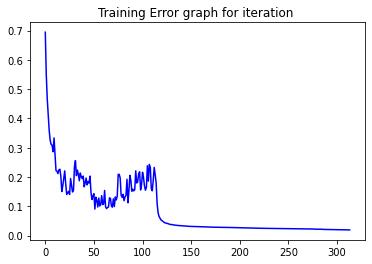

In [54]:
#J(th0, th1, th2, th3, th4, x, y)
plt.title("Training Error graph for iteration ")
plt.plot(range(j+1), np.array(cost_array), color = 'blue' )

plt.show()
  

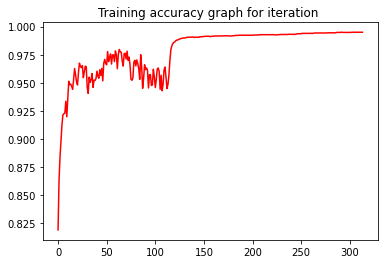

In [55]:
plt.title("Training accuracy graph for iteration ")
plt.plot(range(j+1), np.array(accuracy_array), color = 'red' )

plt.show()